In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft, fftfreq, rfftfreq
import os, re


In [128]:
data_gyro = pd.read_csv('data/acc_gyro_lot_03.csv')
data_vib= pd.read_csv('data/wibracje_lot_03_all.csv')
data_very_damaged = pd.read_csv('data/loty_bardzo_ulamane_smiglo.csv')

In [130]:
data_very_damaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   timestamp(ms)                                       779 non-null    float64
 1   IMU[0].AccX                                         779 non-null    float64
 2   IMU[0].AccY                                         779 non-null    float64
 3   IMU[0].AccZ                                         779 non-null    float64
 4   sqrt(IMU[0].AccX**2+IMU[0].AccY**2+IMU[0].AccZ**2)  779 non-null    float64
dtypes: float64(5)
memory usage: 30.6 KB


In [144]:
def get_first_last_none_index(df, column_name):
    column = df[column_name]
    first_none_index = column.index[column.isnull()].min()
    last_none_index = column.index[column.isnull()].max()
    return first_none_index, last_none_index

def split_array(array, segment_size, overlap):
    splitted_segments = []
    i = 0
    while i < len(array):
        splitted_segments.append(array[i:i+segment_size])
        i += segment_size - overlap
    return splitted_segments


def get_acc(arr1,arr2,arr3):
    sum_of_squares = np.square(arr1) + np.square(arr2) + np.square(arr3)
    result = np.sqrt(sum_of_squares)
    return result


In [145]:
first, second = get_first_last_none_index(data_gyro,'IMU[0].AccY')
time_healthy = data_gyro['timestamp(ms)'].values[:first]-min(data_gyro['timestamp(ms)'].values[:first])
time_damged = data_gyro['timestamp(ms)'].values[second:]-min(data_gyro['timestamp(ms)'].values[second:])
time_very_damaged = data_very_damaged['timestamp(ms)'].values - min(data_very_damaged['timestamp(ms)'].values)

acc_X_healthy = data_gyro['IMU[0].AccX'].values[:first]
acc_Y_healthy = data_gyro['IMU[0].AccY'].values[:first]
acc_Z_healthy = data_gyro['IMU[0].AccZ'].values[:first]
acc_healthy = get_acc(acc_X_healthy,acc_Y_healthy,acc_Z_healthy) # 50 200
gyro_X_healthy = data_gyro['IMU[0].GyrX'].values[:first]
gyro_Y_healthy = data_gyro['IMU[0].GyrY'].values[:first]
gyro_Z_healthy = data_gyro['IMU[0].GyrZ'].values[:first]

acc_X_damaged = data_gyro['IMU[0].AccX'].values[second:]
acc_Y_damaged = data_gyro['IMU[0].AccY'].values[second:]
acc_Z_damaged = data_gyro['IMU[0].AccZ'].values[second:]
acc_damaged = get_acc(acc_X_damaged,acc_Y_damaged,acc_Z_damaged) # 50 180

gyro_X_damaged = data_gyro['IMU[0].GyrX'].values[second:]
gyro_Y_damaged = data_gyro['IMU[0].GyrY'].values[second:]
gyro_Z_damaged = data_gyro['IMU[0].GyrZ'].values[second:]

acc_X_very_damaged = data_very_damaged['IMU[0].AccX'].values[:first]
acc_Y_very_damaged = data_very_damaged['IMU[0].AccY'].values[:first]
acc_Z_very_damaged = data_very_damaged['IMU[0].AccZ'].values[:first]
acc_very_damaged = get_acc(acc_X_very_damaged,acc_Y_very_damaged,acc_Z_very_damaged) # 5 150


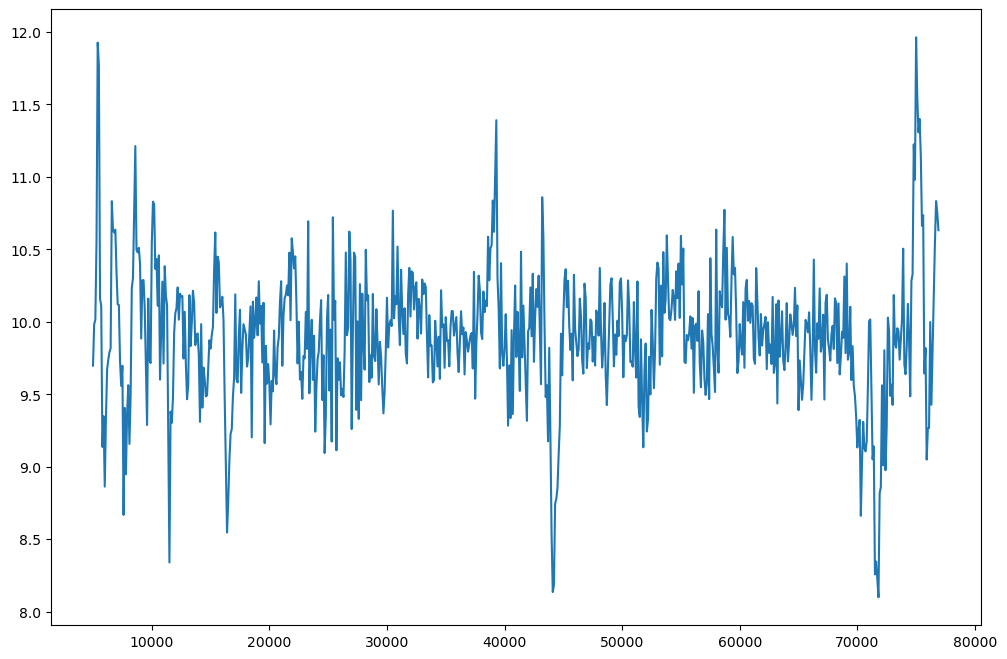

In [175]:
start=50
stop=180
plt.figure(figsize=(12,8))
plt.plot(time_healthy[start:len(time_healthy)-stop],acc_healthy[start:len(time_healthy)-stop])

In [161]:
start = 50
stop = 150
# start = 0
# stop = -1

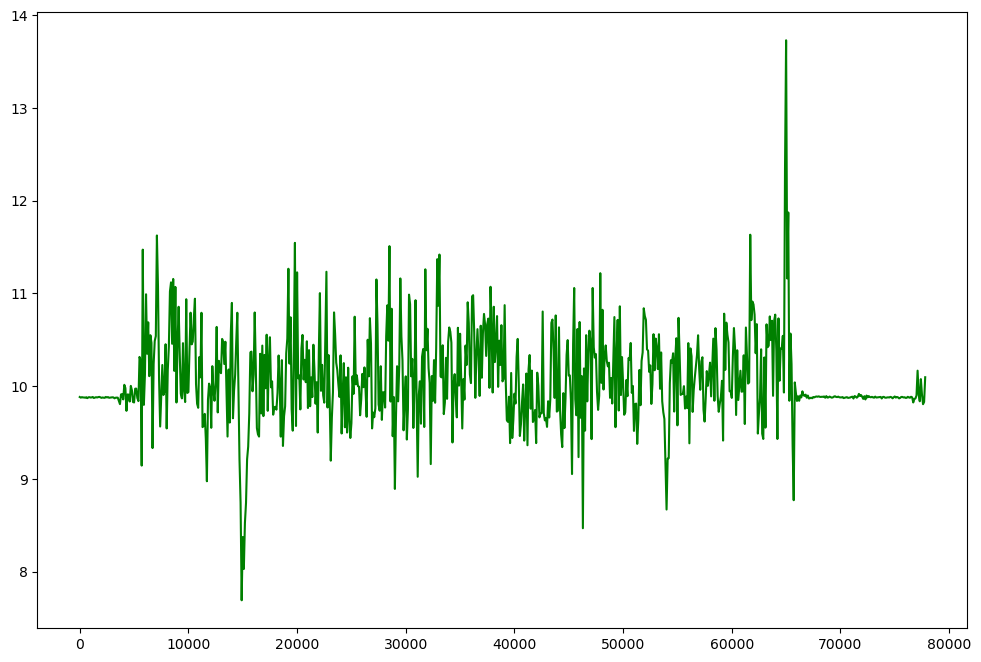

In [210]:
plt.figure(figsize=(12,8))
plt.plot(time_very_damaged, acc_very_damaged, label='Acc_v_damaged',color='green')


Text(0.5, 0, 'time [ms]')

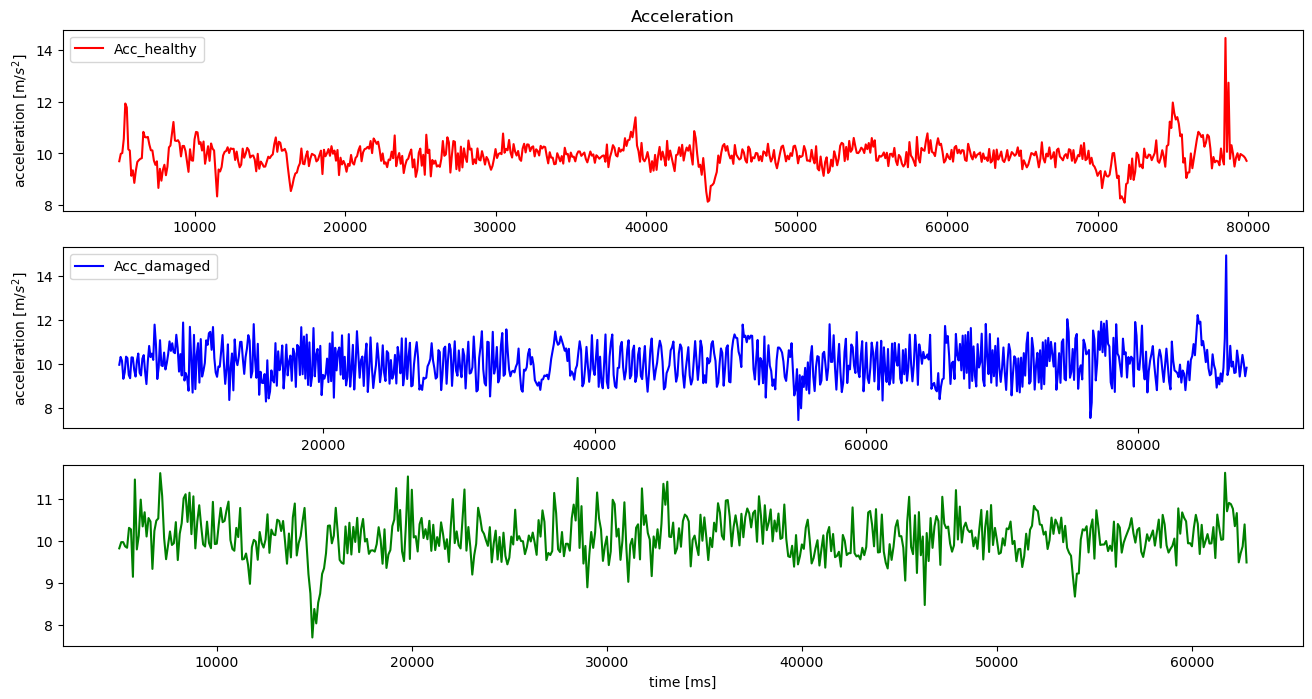

In [162]:
fig,ax = plt.subplots(3,1,figsize=[16,8])
ax[0].set_title('Acceleration')
ax[0].plot(time_healthy[start:len(time_healthy)-stop], acc_healthy[start:len(time_healthy)-stop], label='Acc_healthy',color='red')
# ax[0].plot(time_healthy[start:stop], acc_Y_healthy[start:stop], label='Acc_Y',color='blue')
# ax[0].plot(time_healthy[start:stop], acc_Z_healthy[start:stop], label='Acc_Z',color='green')
ax[1].plot(time_damged[start:len(time_damged)-stop], acc_damaged[start:len(time_damged)-stop], label='Acc_damaged',color='blue')
# ax[1].plot(time_damged[start:stop], acc_Y_damaged[start:stop], label='Acc_Y',color='blue')
# ax[1].plot(time_damged[start:stop], acc_Z_damaged[start:stop], label='Acc_Z',color='green')
ax[2].plot(time_very_damaged[start:len(time_very_damaged)-stop], acc_very_damaged[start:len(time_very_damaged)-stop], label='Acc_v_damaged',color='green')
# ax[2].plot(time_very_damaged[start:stop], acc_Y_very_damaged[start:stop], label='Acc_Y',color='blue')
# ax[2].plot(time_very_damaged[start:stop], acc_Z_very_damaged[start:stop], label='Acc_Z',color='green')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'acceleration [m/$s^2$]')
ax[1].set_ylabel(r'acceleration [m/$s^2$]')
ax[2].set_xlabel('time [ms]')

In [195]:
# times = split_array(time_healthy[start:stop]-min(time_healthy[start:stop]),150,125)
acc_healthy_split = split_array(acc_healthy[50:len(acc_healthy)-200],150,125)
acc_damaged_split = split_array(acc_damaged[50:len(acc_damaged)-180],150,125)
acc_very_damaged_split = split_array(acc_very_damaged[50:len(acc_very_damaged)-150],150,125)

In [204]:
columns_h = [f'Sample {x}' for x in range(len(acc_healthy_split))]
columns_d = [f'Sample {x}' for x in range(len(acc_damaged_split))]
columns_vd = [f'Sample {x}' for x in range(len(acc_very_damaged_split))]

In [205]:
data_healthy = pd.DataFrame(acc_healthy_split).T
data_damged = pd.DataFrame(acc_damaged_split).T
data_very_damged = pd.DataFrame(acc_very_damaged_split).T
data_healthy.columns = columns_h
data_damged.columns = columns_d
data_very_damged.columns = columns_vd

In [208]:
data_healthy.to_csv('data_preprocesed/healthy_samples.csv')
data_damged.to_csv('data_preprocesed/damaged_samples.csv')
data_very_damaged.to_csv('data_preprocesed/very_damaged_samples.csv')

Text(0.5, 0, 'time [ms]')

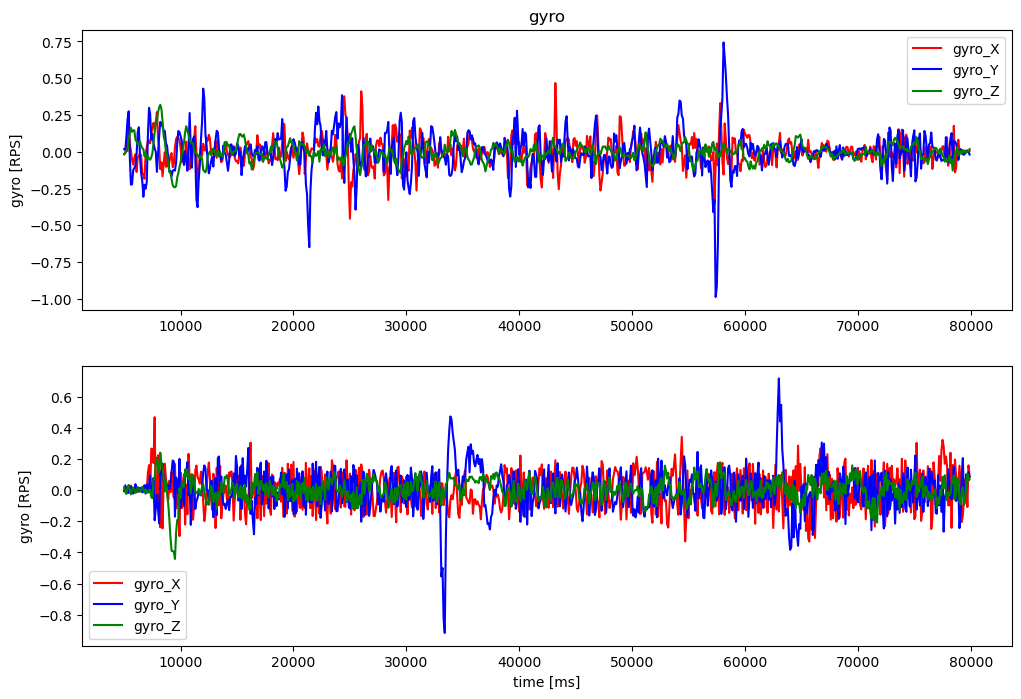

In [122]:
fig,ax = plt.subplots(2,1,figsize=[12,8])
ax[0].set_title('gyro')
ax[0].plot(time_healthy[start:stop], gyro_X_healthy[start:stop], label='gyro_X',color='red')
ax[0].plot(time_healthy[start:stop], gyro_Y_healthy[start:stop], label='gyro_Y',color='blue')
ax[0].plot(time_healthy[start:stop], gyro_Z_healthy[start:stop], label='gyro_Z',color='green')
ax[1].plot(time_damged[start:stop], gyro_X_damaged[start:stop], label='gyro_X',color='red')
ax[1].plot(time_damged[start:stop], gyro_Y_damaged[start:stop], label='gyro_Y',color='blue')
ax[1].plot(time_damged[start:stop], gyro_Z_damaged[start:stop], label='gyro_Z',color='green')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel('gyro [RPS]')
ax[1].set_ylabel('gyro [RPS]')
ax[1].set_xlabel('time [ms]')